In [1]:
'''Assignment 1: k-NN Classification Algorithm & Application for Letter Recognition
AIT-736, Instructor: Dr. Liao, Date: 9/15/2022
Khanh Nguyen, Anisha Mou, Rohan Jonnakuti, Vishveshwar Kondala

The code below using basic Python functions to build k-NN algorithms from scratch to implement the basic k-NN classification 
with a given Letter Recognition dataset using the k number = 1.  This dataset includes
20,000 examples. The first 15,000 examples are used for training and the remaining 5,000 for testing.

'''
import math
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from collections import Counter
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#Changing path to working directory
working_directory = os.getcwd()
os.chdir(working_directory)

In [2]:
df = pd.read_csv('letter-recognition_data1.csv')

df.shape

(19999, 17)

In [3]:
df.head()

,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4,T
0,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10,I
1,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9,D
2,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8,N
3,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10,G
4,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7,S


In [4]:
vect_df = np.array(df)
print("Shape of Vectorized dataset:",vect_df.shape)
print(vect_df)

Shape of Vectorized dataset: (19999, 17)
[[5 12 3 ... 4 10 'I']
 [4 11 6 ... 3 9 'D']
 [7 11 6 ... 2 8 'N']
 ...
 [6 9 6 ... 2 4 'T']
 [2 3 4 ... 5 8 'S']
 [4 9 6 ... 2 8 'A']]


In [5]:
X = np.array(vect_df[:,:-1]) #all data except last column
print("Shape of X", X.shape) 
print(X)
y = np.array(vect_df[:,-1]) #only last column
print("\nShape of y:",y.shape)
print(y)

Shape of X (19999, 16)
[[5 12 3 ... 8 4 10]
 [4 11 6 ... 7 3 9]
 [7 11 6 ... 10 2 8]
 ...
 [6 9 6 ... 12 2 4]
 [2 3 4 ... 9 5 8]
 [4 9 6 ... 7 2 8]]

Shape of y: (19999,)
['I' 'D' 'N' ... 'T' 'S' 'A']


In [6]:
#Split the dataset base on percentage
s_f = 0.75
n_train = math.floor(s_f * X.shape[0])
n_test = math.ceil((1-s_f) * X.shape[0])
X_train = X[:n_train]
y_train = y[:n_train]
X_test = X[n_train:]
y_test = y[n_train:]
print("Total Number of rows in train:",X_train.shape[0])
print("Total Number of rows in test:",X_test.shape[0])

Total Number of rows in train: 14999
Total Number of rows in test: 5000


In [7]:
X_train

array([[5, 12, 3, ..., 8, 4, 10],
       [4, 11, 6, ..., 7, 3, 9],
       [7, 11, 6, ..., 10, 2, 8],
       ...,
       [6, 9, 9, ..., 8, 3, 5],
       [6, 9, 7, ..., 10, 8, 7],
       [6, 11, 6, ..., 10, 4, 8]], dtype=object)

In [8]:
%%time
#Split the Letter Recognition Dataset
df = pd.read_csv('letter-recognition_data1.csv')

#shuffling the dataset randomly
# df = df.sample(frac = 1)

def split_dataframe_by_position(df, splits):
    """
    Takes a dataframe and an integer of the number of splits to create.
    Returns a list of dataframes.
    """
    dataframes = []
    index_to_split = 15000
    start = 0
    end = index_to_split
    for split in range(splits):
        temporary_df = df.iloc[start:end, :]
        dataframes.append(temporary_df)
        start += index_to_split
        end += index_to_split
    return dataframes
split_dataframes = split_dataframe_by_position(df, 2)
trainset = split_dataframes[0]
testset = split_dataframes[1]
trainset.to_csv('trainset.csv')
testset.to_csv('testset.csv')
print("Trainset size:", trainset.shape)
print("testset size:", testset.shape)

Trainset size: (15000, 17)
testset size: (4999, 17)
Wall time: 145 ms


In [9]:
trainset

,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4,T
0,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10,I
1,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9,D
2,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8,N
3,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10,G
4,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,1,9,0,6,0,7,7,4,4,7,6,8,0,8,0,8,I
14996,6,9,9,7,5,3,9,3,7,11,11,11,3,8,3,5,K
14997,6,9,7,8,7,6,8,4,9,8,8,8,3,10,8,7,T
14998,6,11,6,8,3,4,13,9,2,10,6,3,1,10,4,8,P


In [10]:
# Convert training and testing set to lists
training = trainset.values.tolist()
testing = testset.values.tolist()

# Create a list exclude the labels (the column with letters)
test1 = testset.iloc[:,:-1] #all data except last column
test1 = test1.values.tolist()


In [11]:
#Extract the actual letters from the test set (last column) and convert to a list for Accuracy calculation
test_letters = testset.iloc[:, -1:]  #select only the last column
test_letters = test_letters.values.tolist()
actual_letters = list()
for letter in test_letters:
    actual_letters += letter
print(actual_letters[:10])

['U', 'K', 'D', 'E', 'I', 'V', 'V', 'U', 'D', 'U']


In [12]:
%%time
# Make Predictions with k-nearest neighbors on the Letter Recognition Dataset

# Load a CSV file
def load_csv(filename):
	dataset = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		for row in csv_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset

# Convert string column to float
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())

# Convert string column to integer
def str_column_to_int(dataset, column):
	class_values = [row[column] for row in dataset]
	unique = set(class_values)
	lookup = dict()
	for i, value in enumerate(unique):
		lookup[value] = i
		print('[%s] => %d' % (value, i))
	for row in dataset:
		row[column] = lookup[row[column]]
	return lookup

# Find the min and max values for each column
def dataset_minmax(dataset):
	minmax = list()
	for i in range(len(dataset[0])):
		col_values = [row[i] for row in dataset]
		value_min = min(col_values)
		value_max = max(col_values)
		minmax.append([value_min, value_max])
	return minmax

# Rescale dataset columns to the range 0-1
def normalize_dataset(dataset, minmax):
	for row in dataset:
		for i in range(len(row)):
			row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])



Wall time: 0 ns


In [13]:
%%time
# Calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)-1):
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)

# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
	distances = list()
	for train_row in train:
		dist = euclidean_distance(test_row, train_row)
		distances.append((train_row, dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(num_neighbors):
		neighbors.append(distances[i][0])
	return neighbors

# Make a prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
	neighbors = get_neighbors(train, test_row, num_neighbors)
	output_values = [row[-1] for row in neighbors]
	prediction = max(set(output_values), key=output_values.count)
	return prediction

# Make a prediction with KNN on Letter Recognition Dataset
filename =  'letter-recognition_data1.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])-1):
	str_column_to_float(dataset, i)
# convert class column to integers
str_column_to_int(dataset, len(dataset[0])-1)
# define model parameter
num_neighbors = 5
# test the second row from the dataset
row = [5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10]
# predict the label
label = predict_classification(dataset, row, num_neighbors)
print('Data=%s, Predicted: %s' % (row, label))

[Y] => 0
[B] => 1
[I] => 2
[L] => 3
[D] => 4
[U] => 5
[H] => 6
[A] => 7
[C] => 8
[N] => 9
[W] => 10
[Z] => 11
[T] => 12
[V] => 13
[J] => 14
[K] => 15
[P] => 16
[E] => 17
[O] => 18
[X] => 19
[Q] => 20
[M] => 21
[F] => 22
[S] => 23
[R] => 24
[G] => 25
Data=[5, 12, 3, 7, 2, 10, 5, 5, 4, 13, 3, 9, 2, 8, 4, 10], Predicted: 2
Wall time: 621 ms


In [14]:
%%time
# Calculate the Manhattan distance between two vectors
def manhattan_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)-1):
		distance += abs(row1[i] - row2[i])
	return distance

# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
	distances = list()
	for train_row in train:
		dist = manhattan_distance(test_row, train_row)
		distances.append((train_row, dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(num_neighbors):
		neighbors.append(distances[i][0])
	return neighbors

# Make a prediction with neighbors
def manhattan_classification(train, test_row, num_neighbors):
	neighbors = get_neighbors(train, test_row, num_neighbors)
	output_values = [row[-1] for row in neighbors]
	prediction = max(set(output_values), key=output_values.count)
	return prediction

# Make a prediction with KNN on Letter Recognition Dataset
filename =  'letter-recognition_data1.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])-1):
	str_column_to_float(dataset, i)
# convert class column to integers
str_column_to_int(dataset, len(dataset[0])-1)
# define model parameter
num_neighbors = 5
# test the second row from the dataset
row = [5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10]
# predict the label
label = manhattan_classification(dataset, row, num_neighbors)
print('Data=%s, Predicted: %s' % (row, label))

[Y] => 0
[B] => 1
[I] => 2
[L] => 3
[D] => 4
[U] => 5
[H] => 6
[A] => 7
[C] => 8
[N] => 9
[W] => 10
[Z] => 11
[T] => 12
[V] => 13
[J] => 14
[K] => 15
[P] => 16
[E] => 17
[O] => 18
[X] => 19
[Q] => 20
[M] => 21
[F] => 22
[S] => 23
[R] => 24
[G] => 25
Data=[5, 12, 3, 7, 2, 10, 5, 5, 4, 13, 3, 9, 2, 8, 4, 10], Predicted: 2
Wall time: 687 ms


In [15]:
%%time
#Use k number of neighbors and predict the letters with the Euclidean-distance algorithms above
num_neighbors = 1
# predict the label
predicted = list()
for row in test1:
    label = predict_classification(training, row, num_neighbors)
    predicted.append(label)

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0

#get the Accuracy score for the nearest neighbor algorithm
accuracy_score = accuracy_metric(actual_letters, predicted)
print("The accurarcy score of the nearest neighbor with Euclidean distance algorithm:", accuracy_score)

The accurarcy score of the nearest neighbor with Euclidean distance algorithm: 93.85877175435087
Wall time: 7min 27s


In [16]:
%%time
#Use k number of neighbors and predict the letters with the Mahattan-distance algorithms above
num_neighbors = 1
# predict the label
predicted = list()
for row in test1:
    label = manhattan_classification(training, row, num_neighbors)
    predicted.append(label)

# print(predicted)
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0

#get the Accuracy score for the nearest neighbor Manhattan distance algorithm
accuracy_score = accuracy_metric(actual_letters, predicted)
print("The accurarcy score of the nearest neighbor with Manhattan-distance algorithm:", accuracy_score)

The accurarcy score of the nearest neighbor with Manhattan-distance algorithm: 93.85877175435087
Wall time: 7min 36s


## Interpretation:
With Euclidean-distance algorithm, the accuracy score is at 93.86% for k=1 with the time is 7min 27s.
With Manhattan-distance algorithm, the accuracy score is similar at 93.86% for k=1 but it has the time to compute is 7min 36s.
Overall the 2 algorithms have similar accuracy score but the time to compute between each algorithm is slightly different.


In [17]:
# Calculate Confusion Matrix without scikit-learn
def confusionmatrix(actual, predicted, normalize = False):
    """
    Generate a confusion matrix for multiple classification
    @params:
        actual      - a list of integers or strings for known classes
        predicted   - a list of integers or strings for predicted classes
        normalize   - optional boolean for matrix normalization
    @return:
        matrix      - a 2-dimensional list of pairwise counts
    """
    unique = sorted(set(actual))
    matrix = [[0 for _ in unique] for _ in unique]
    imap   = {key: i for i, key in enumerate(unique)}
    # Generate Confusion Matrix
    for p, a in zip(predicted, actual):
        matrix[imap[p]][imap[a]] += 1
    # Matrix Normalization
    if normalize:
        sigma = sum([sum(matrix[imap[i]]) for i in unique])
        matrix = [row for row in map(lambda i: list(map(lambda j: j / sigma, i)), matrix)]
    return matrix

cm = confusionmatrix(actual_letters, predicted)
print("Confusion matrix for each letter: A-Z")
for line in cm:
    print(line)

Confusion matrix for each letter: A-Z
[199, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 162, 0, 3, 1, 1, 1, 1, 0, 0, 2, 0, 0, 2, 1, 0, 0, 2, 2, 0, 2, 2, 0, 1, 0, 0]
[0, 0, 162, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]
[0, 1, 0, 199, 0, 0, 1, 4, 0, 0, 1, 0, 1, 2, 1, 1, 1, 3, 0, 1, 0, 0, 0, 1, 0, 0]
[2, 0, 3, 0, 166, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 1, 177, 0, 0, 3, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]
[0, 0, 5, 1, 6, 0, 192, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[1, 2, 0, 5, 0, 1, 1, 153, 0, 0, 7, 1, 0, 3, 0, 2, 2, 5, 1, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 200, 5, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 2, 176, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 1, 0, 2, 7, 0, 0, 160, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 6, 0, 0]
[0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 198, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

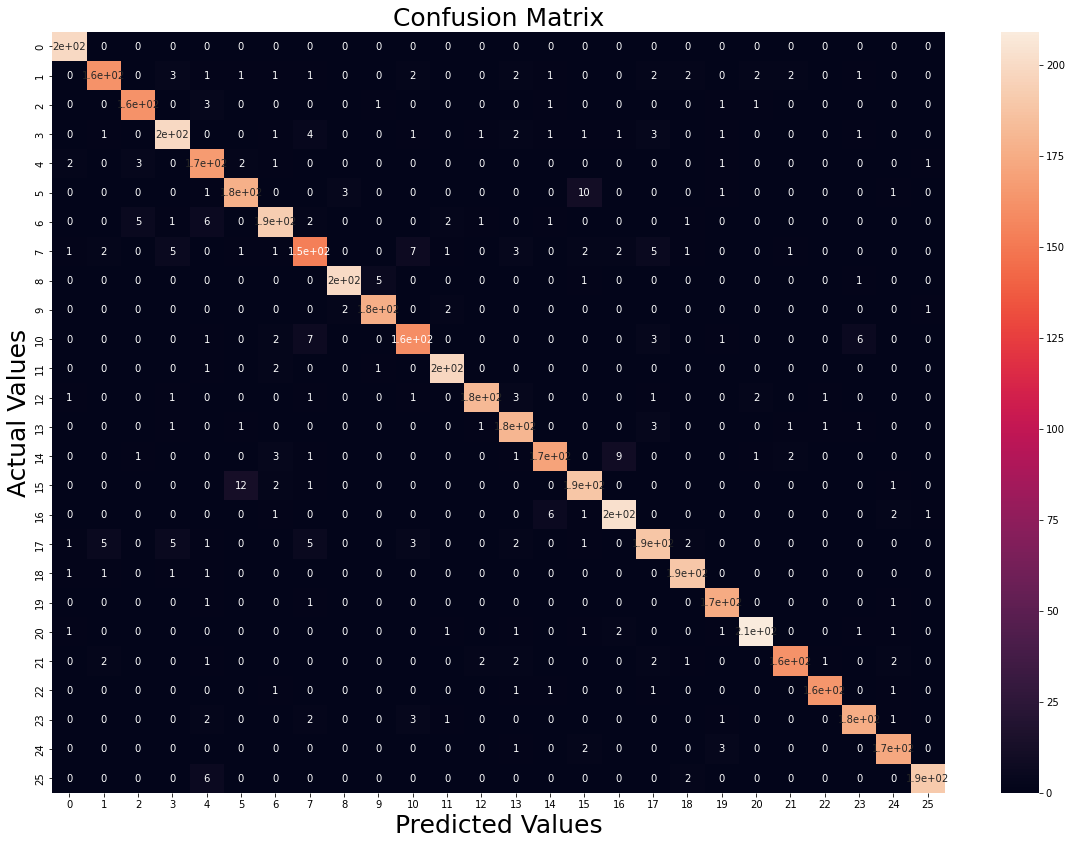

In [18]:
#Plotting the confusion matrix

plt.figure(figsize=(20, 14))
sns.heatmap(cm, annot=True)
plt.rc('axes.formatter', useoffset=False)
plt.title('Confusion Matrix', size = 25)
plt.ylabel('Actual Values', size = 25)
plt.xlabel('Predicted Values', size = 25)
# plt.gca().yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=False))
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.show()


In [19]:
# Create a confusion matrix with Pandas series and crosstab
y_actu = pd.Series(actual_letters, name='Actual')
y_pred = pd.Series(predicted, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

Predicted,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
Actual,,,,,,,,,,,,,,,,,,,,,
A,199,0,0,0,2,0,0,1,0,0,...,0,1,1,0,1,0,0,0,0,0
B,0,162,0,1,0,0,0,2,0,0,...,0,5,1,0,0,2,0,0,0,0
C,0,0,162,0,3,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
D,0,3,0,199,0,0,1,5,0,0,...,0,5,1,0,0,0,0,0,0,0
E,0,1,3,0,166,1,6,0,0,0,...,0,1,1,1,0,1,0,2,0,6
F,0,1,0,0,2,177,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
G,0,1,0,1,1,0,192,1,0,0,...,1,0,0,0,0,0,1,0,0,0
H,0,1,0,4,0,0,2,153,0,0,...,0,5,0,1,0,0,0,2,0,0
I,0,0,0,0,0,3,0,0,200,2,...,0,0,0,0,0,0,0,0,0,0


In [20]:
#
df_conf_sum = pd.crosstab(y_actu, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
df_conf_sum

Predicted,A,B,C,D,E,F,G,H,I,J,...,R,S,T,U,V,W,X,Y,Z,All
Actual,,,,,,,,,,,,,,,,,,,,,
A,199,0,0,0,2,0,0,1,0,0,...,1,1,0,1,0,0,0,0,0,206
B,0,162,0,1,0,0,0,2,0,0,...,5,1,0,0,2,0,0,0,0,173
C,0,0,162,0,3,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,171
D,0,3,0,199,0,0,1,5,0,0,...,5,1,0,0,0,0,0,0,0,216
E,0,1,3,0,166,1,6,0,0,0,...,1,1,1,0,1,0,2,0,6,191
F,0,1,0,0,2,177,0,1,0,0,...,0,0,0,0,0,0,0,0,0,194
G,0,1,0,1,1,0,192,1,0,0,...,0,0,0,0,0,1,0,0,0,207
H,0,1,0,4,0,0,2,153,0,0,...,5,0,1,0,0,0,2,0,0,178
I,0,0,0,0,0,3,0,0,200,2,...,0,0,0,0,0,0,0,0,0,205


In [21]:
df_confusion = pd.crosstab(y_actu, y_pred)
df_conf_norm = df_confusion.div(df_confusion.sum(axis=1), axis="index")
df_conf_norm

Predicted,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
Actual,,,,,,,,,,,,,,,,,,,,,
A,0.966019,0.000000,0.000000,0.000000,0.009709,0.000000,0.000000,0.004854,0.000000,0.000000,...,0.000000,0.004854,0.004854,0.000000,0.004854,0.000000,0.000000,0.000000,0.000000,0.000000
B,0.000000,0.936416,0.000000,0.005780,0.000000,0.000000,0.000000,0.011561,0.000000,0.000000,...,0.000000,0.028902,0.005780,0.000000,0.000000,0.011561,0.000000,0.000000,0.000000,0.000000
C,0.000000,0.000000,0.947368,0.000000,0.017544,0.000000,0.029240,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
D,0.000000,0.013889,0.000000,0.921296,0.000000,0.000000,0.004630,0.023148,0.000000,0.000000,...,0.000000,0.023148,0.004630,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
E,0.000000,0.005236,0.015707,0.000000,0.869110,0.005236,0.031414,0.000000,0.000000,0.000000,...,0.000000,0.005236,0.005236,0.005236,0.000000,0.005236,0.000000,0.010471,0.000000,0.031414
F,0.000000,0.005155,0.000000,0.000000,0.010309,0.912371,0.000000,0.005155,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
G,0.000000,0.004831,0.000000,0.004831,0.004831,0.000000,0.927536,0.004831,0.000000,0.000000,...,0.004831,0.000000,0.000000,0.000000,0.000000,0.000000,0.004831,0.000000,0.000000,0.000000
H,0.000000,0.005618,0.000000,0.022472,0.000000,0.000000,0.011236,0.859551,0.000000,0.000000,...,0.000000,0.028090,0.000000,0.005618,0.000000,0.000000,0.000000,0.011236,0.000000,0.000000
I,0.000000,0.000000,0.000000,0.000000,0.000000,0.014634,0.000000,0.000000,0.975610,0.009756,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


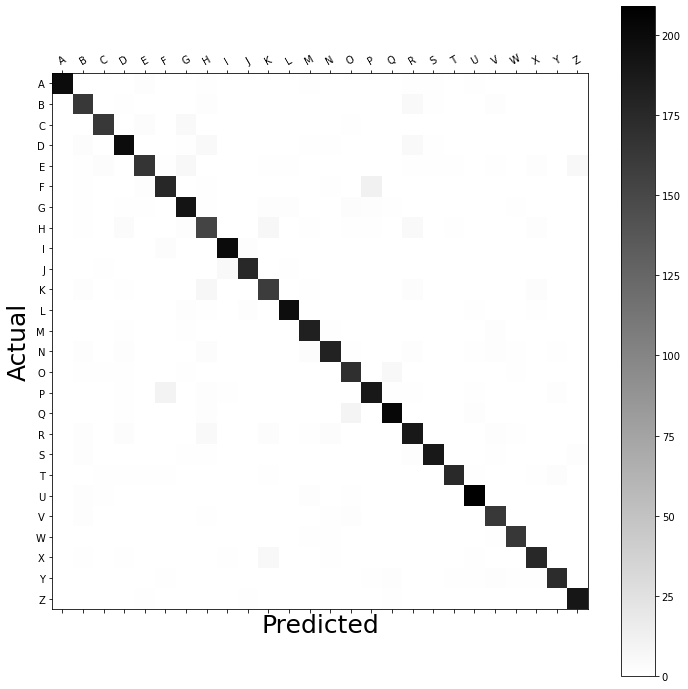

In [22]:

from matplotlib.pyplot import figure

colors_list=np.random.rand(26)
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap= plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=30)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name, size = 25)
    plt.xlabel(df_confusion.columns.name, size = 25)

plt.rcParams["figure.figsize"] = (12, 12)
df_confusion = pd.crosstab(y_actu, y_pred)
plot_confusion_matrix(df_confusion)

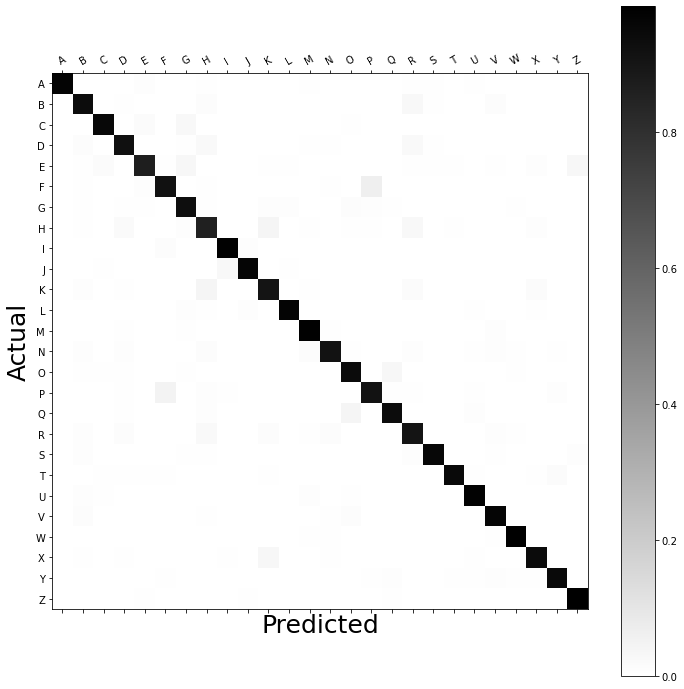

In [23]:
plot_confusion_matrix(df_conf_norm) 

In [ ]:
%%time
# adding column name to the respective columns
df.columns =['Num1', 'Num2', 'Num3', 'Num4','Num5','Num6','Num7','Num8','Num9','Num10','Num11','Num12','Num13','Num14','Num15','Num16','letter']
# View the relationships between variables; color code by species type
di= {0.0: 'L', 1.0: 'X', 2.0:'T', 3.0: 'G', 4.0: 'D', 5.0: 'F', 6.0: 'S', 7.0: 'H', 8.0: 'B', 9.0: 'M', 10.0: 'N', 11.0: 'Z', 12.0: 'A', 13.0: 'O', 14.0: 'Y', 15.0: 'I', 16.0: 'E', 17.0: 'W', 18.0: 'U', 19.0: 'P', 20.0: 'Q', 21.0: 'V', 22.0: 'J', 23.0: 'C', 24.0: 'R', 25.0: 'K'} # dictionary

before= sns.pairplot(df.replace({'letter': di}), hue= 'letter')
before.fig.suptitle('Pair Plot of the dataset', y=1.08)

## REFERENCES
Brownlee, J. (2019).  Develop k-Nearest Neighbors in Python from Scratch. Machine Learning Mastery.  Retrieved on 11 September 2022 from https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/

jkwon. (2015). How to write a confusion matrix. Retrieved on 12 September 12 from https://stackoverflow.com/questions/2148543/how-to-write-a-confusion-matrix